Erangel weapon category counts:
 AR         338
Unknown     96
DMR         56
SMG         29
SR           2
SG           1
Pistol       1
Name: weapon_category, dtype: int64

Miramar weapon category counts:
 AR         498
DMR        217
Unknown     92
SMG          6
SR           5
Pistol       1
SG           1
Name: weapon_category, dtype: int64


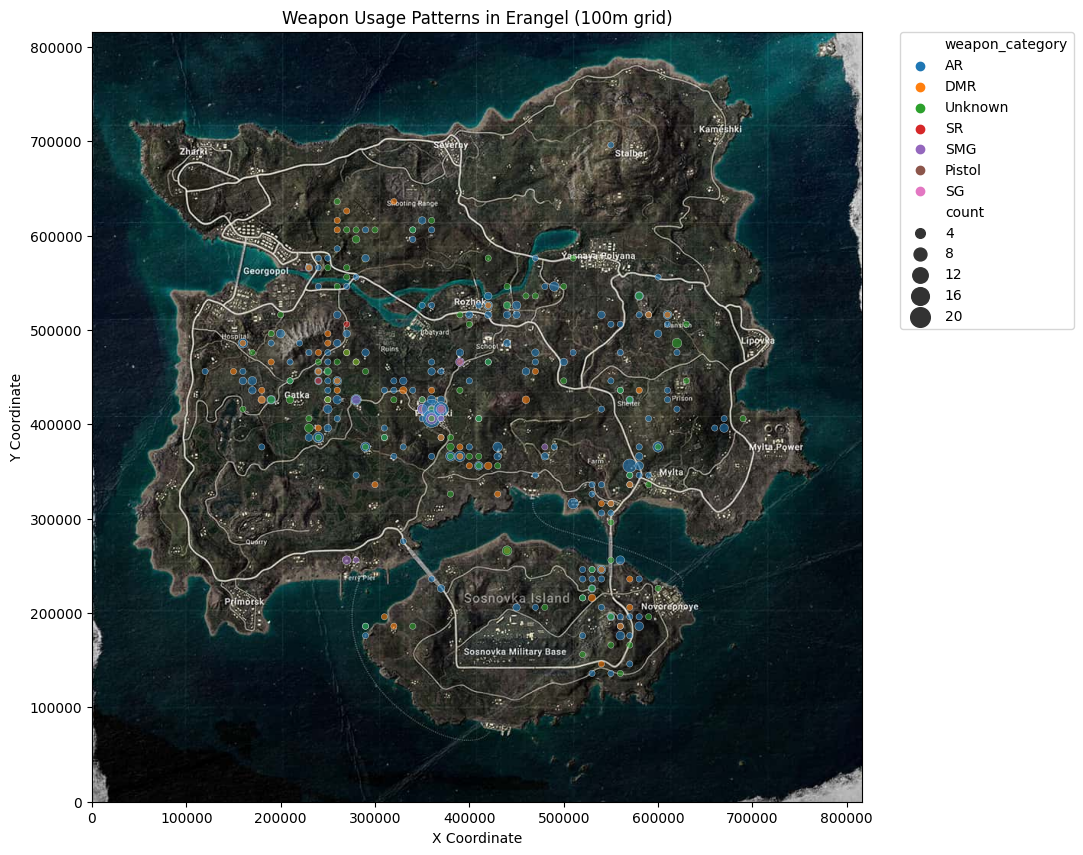

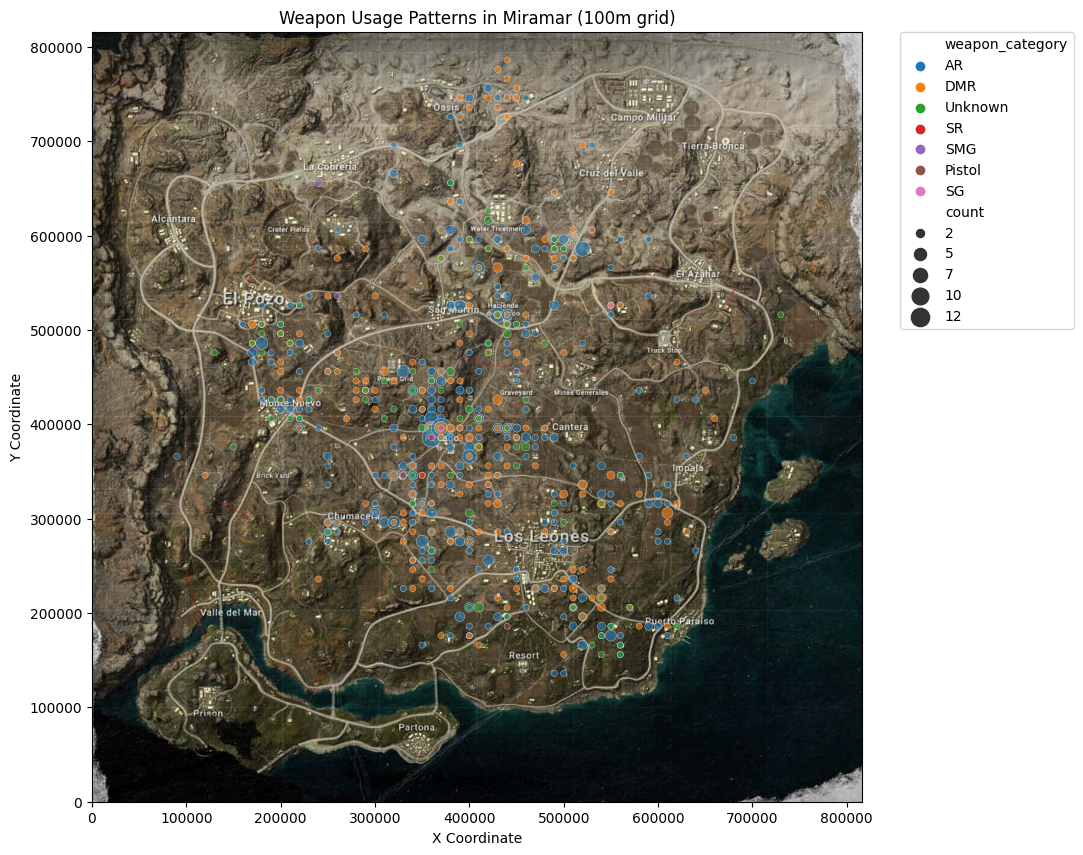

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.spatial import KDTree

file_path = 'kill_weapon.csv'
data = pd.read_csv(file_path)

# 이상치 매치 ID 제거
outlier_match_ids = [
    '618291a3-d2a6-4b33-be8a-0bcd96e7760a', 
    '3bb55936-e760-45eb-a18d-3e8f50908f8b', 
    '3cb5f78e-4ebd-4cba-868a-fbdc248bcf0b'
]
filtered_data = data[~data['match_id'].isin(outlier_match_ids)].copy()

# 무기가 아닌 킬 제외
weapon_data = filtered_data[filtered_data['weapon_used'].str.contains('Weap')].copy()

# 위치 값을 100미터 단위로 구역 분할
def bin_location(value):
    return (value // 10000) * 10000

# 위치 컬럼에 구역 나누기 함수 적용
weapon_data.loc[:, 'killer_location_x'] = weapon_data['killer_location_x'].apply(bin_location)
weapon_data.loc[:, 'killer_location_y'] = weapon_data['killer_location_y'].apply(bin_location)

# 무기 카테고리 분류
weapon_categories = {
    'AR': ['WeapBerylM762_C', 'WeapAK47_C', 'WeapGroza_C', 'WeapHK416_C', 'WeapSCAR-L_C', 'WeapM16A4_C', 'WeapQBZ95_C', 'WeapAUG_C', 'WeapMk47Mutant_C'],
    'DMR': ['WeapSKS_C', 'WeapMini14_C', 'WeapMk14_C', 'WeapQBU88_C', 'WeapVSS_C'],
    'SR': ['WeapKar98k_C', 'WeapM24_C', 'WeapAWM_C', 'WeapWinchester_C'],
    'SMG': ['WeapThompson_C', 'WeapUZI_C', 'WeapBizonPP19_C', 'WeapUMP_C', 'WeapVector_C'],
    'SG': ['WeapBerreta686_C', 'WeapSaiga12_C'],
    'Pistol': ['WeapM1911_C', 'WeapRhino_C']
}

# 무기 카테고리 추가
def get_weapon_category(weapon):
    for category, weapons in weapon_categories.items():
        if weapon in weapons:
            return category
    return 'Unknown'

weapon_data['weapon_category'] = weapon_data['weapon_used'].apply(get_weapon_category)

# 각 맵에 대한 데이터 필터링
erangel_data = weapon_data[weapon_data['map_name'] == 'Baltic_Main']
miramar_data = weapon_data[weapon_data['map_name'] == 'Desert_Main']

# 각 맵에 대해 위치별 무기 사용 패턴 추출
erangel_weapon_detail = erangel_data.groupby(['killer_location_x', 'killer_location_y', 'weapon_category']).size().reset_index(name='count')
miramar_weapon_detail = miramar_data.groupby(['killer_location_x', 'killer_location_y', 'weapon_category']).size().reset_index(name='count')

# 각 맵에 대해 무기 카테고리별 수치 계산
erangel_category_counts = erangel_data['weapon_category'].value_counts()
miramar_category_counts = miramar_data['weapon_category'].value_counts()

# 각 맵에 대해 무기 카테고리별 수치 출력
print("Erangel weapon category counts:\n", erangel_category_counts)
print("\nMiramar weapon category counts:\n", miramar_category_counts)

erangel_img_path = 'Baltic_Main.jpg'
erangel_img = mpimg.imread(erangel_img_path)

# 에란겔 맵 시각화
plt.figure(figsize=(10, 10))
plt.imshow(erangel_img, extent=[0, 816000, 0, 816000])
sns.scatterplot(data=erangel_weapon_detail, x='killer_location_x', y=816000 - erangel_weapon_detail['killer_location_y'], hue='weapon_category', size='count', sizes=(20, 200), alpha=0.6, palette='tab10')
plt.title('Weapon Usage Patterns in Erangel (100m grid)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

miramar_img_path = 'Desert_Main.jpg'
miramar_img = mpimg.imread(miramar_img_path)

# 미라마 맵 시각화
plt.figure(figsize=(10, 10))
plt.imshow(miramar_img, extent=[0, 816000, 0, 816000])
sns.scatterplot(data=miramar_weapon_detail, x='killer_location_x', y=816000 - miramar_weapon_detail['killer_location_y'], hue='weapon_category', size='count', sizes=(20, 200), alpha=0.6, palette='tab10')
plt.title('Weapon Usage Patterns in Miramar (100m grid)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
